## Generating a reasonable covariance matrix for the RTS-96

1. Derive formula for the curve in the figure below.
<img src=../images/correlation-vs-distance.png width=600>

2. Assign geographical coordinates to the 18 wind farms. Make sure to divide them into three independent areas.

3. Build the distance matrix

4. Use the relationship between correlation and distance to turn the distance matrix into a covariance matrix.

### Step 1: derive relationship between correlation coefficient and distance

In [1]:
function polyfit(x, y, n)
  A = [ float(x[i])^p for i = 1:length(x), p = 0:n ]
  A \ y
end

polyfit (generic function with 1 method)

In [2]:
x = [0;200;400;600;800;1000;1200.]
y = [0.88;0.65;0.45;0.30;0.20;0.12;0.08]
coef = polyfit(x,y,2)
f(x) = coef[1] + coef[2].*x + coef[3].*x.^2

f (generic function with 1 method)

In [3]:
using PyPlot
PyPlot.svg(true)

true

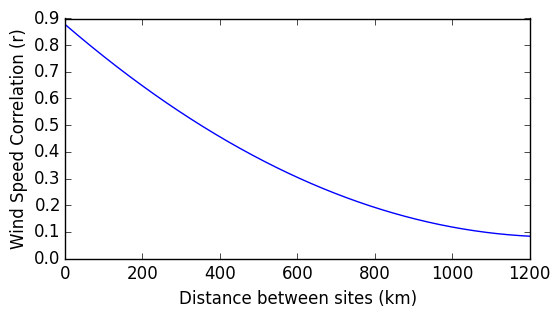

PyObject <matplotlib.text.Text object at 0x7f0f56c530f0>

In [4]:
xx = collect(linspace(0,1200,800))
fig = figure(figsize=(6,3))
plot(xx,f(xx))
xlabel("Distance between sites (km)")
ylabel("Wind Speed Correlation (r)")

Looks good to me.

### Step 2: assign geographical coordinates to RTS-96 wind nodes

In [5]:
using JLD
d = load("../data/polish_line_lengths.jld")["line_lengths"]./1e3 # line lengths in km

3693-element Array{Float64,1}:
  25.7494
  54.7176
  57.9362
  25.7494
  43.4522
  25.7494
  19.3121
  44.2569
  53.1082
  25.7494
  88.5137
 115.872 
  54.7176
   ⋮     
  19.3121
  88.5137
  54.7176
  25.7494
  75.639 
  69.2016
  28.9681
  24.1401
  44.2569
  49.8895
  96.5604
  28.9681

In [73]:
function returncoordinates(n,lower,upper)
    c = rand(collect(lower:upper),2*n)
    return [(c[i],c[i+1]) for i in 1:n]
end

returncoordinates (generic function with 1 method)

In [77]:
g1 = returncoordinates(9,200,600)
g2 = returncoordinates(6,200,600)
g3 = returncoordinates(3,200,600)

3-element Array{Tuple{Int64,Int64},1}:
 (254,216)
 (216,539)
 (539,273)

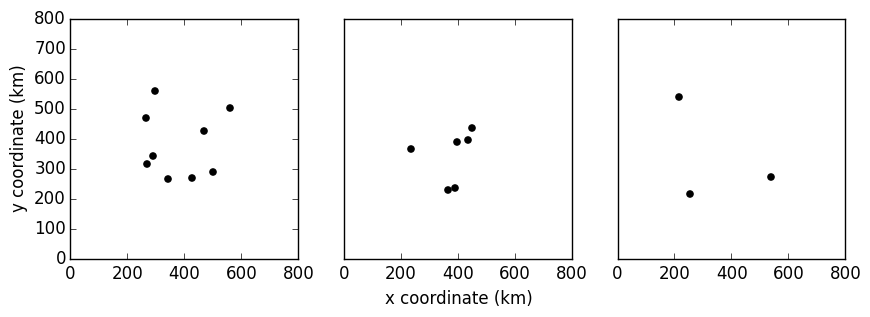

4-element Array{Int64,1}:
   0
 800
   0
 800

In [78]:
fig = figure(figsize=(10,3))
subplot(1,3,1)
scatter([p[1] for p in g1],[p[2] for p in g1],c="k")
xticks(collect(0:200:800))
axis([0;800;0;800])
ylabel("y coordinate (km)")

subplot(1,3,2)
scatter([p[1] for p in g2],[p[2] for p in g2],c="k")
yticks([])
xticks(collect(0:200:800))
axis([0;800;0;800])
xlabel("x coordinate (km)")

subplot(1,3,3)
scatter([p[1] for p in g3],[p[2] for p in g3],c="k")
yticks([])
xticks(collect(0:200:800))
axis([0;800;0;800])

### Step 3: build the distance matrix



In [89]:
function distancematrix(pts)
    n = length(pts)
    D = zeros(n,n)
    for i in 1:n
        for j in 1:n
            D[i,j] = hypot(pts[i][1] - pts[j][1],pts[i][2] - pts[j][2])
        end
    end
    return D
end

distancematrix (generic function with 1 method)

In [133]:
D1 = distancematrix(g1)
D2 = distancematrix(g2)
D3 = distancematrix(g3)

3x3 Array{Float64,2}:
   0.0    325.228  290.644
 325.228    0.0    418.432
 290.644  418.432    0.0  

### Map distances to correlation coefficients


In [128]:
function dist2cor(dist)
    function polyfit(x, y, n)
      A = [ float(x[i])^p for i = 1:length(x), p = 0:n ]
      A \ y
    end
    x = [0;200;400;600;800;1000;1200.]
    y = [0.88;0.65;0.45;0.30;0.20;0.12;0.08]
    coef = polyfit(x,y,2)
    f(x) = coef[1] + coef[2].*x + coef[3].*x.^2
    D = f(dist)
    for i in 1:size(D,1)
        D[i,i] = 1.0
    end
    return D
end

dist2cor (generic function with 1 method)

In [134]:
C1 = dist2cor(D1)
C2 = dist2cor(D2)
C3 = dist2cor(D3)

3x3 Array{Float64,2}:
 1.0       0.523398  0.55623 
 0.523398  1.0       0.440764
 0.55623   0.440764  1.0     

### All together

In [3]:
function polyfit(x, y, n)
  A = [ float(x[i])^p for i = 1:length(x), p = 0:n ]
  A \ y
end

function returncoordinates(n,lower,upper)
    c = rand(collect(lower:upper),2*n)
    return [(c[i],c[i+1]) for i in 1:n]
end

function distancematrix(pts)
    n = length(pts)
    D = zeros(n,n)
    for i in 1:n
        for j in 1:n
            D[i,j] = hypot(pts[i][1] - pts[j][1],pts[i][2] - pts[j][2])
        end
    end
    return D
end

function dist2cor(dist)
    function polyfit(x, y, n)
      A = [ float(x[i])^p for i = 1:length(x), p = 0:n ]
      A \ y
    end
    x = [0;200;400;600;800;1000;1200.]
    y = [0.88;0.65;0.45;0.30;0.20;0.12;0.08]
    coef = polyfit(x,y,2)
    f(x) = coef[1] + coef[2].*x + coef[3].*x.^2
    D = f(dist)
    for i in 1:size(D,1)
        D[i,i] = 1.0
    end
    return D
end

dist2cor (generic function with 1 method)

In [4]:
g1 = returncoordinates(9,200,600)
g2 = returncoordinates(6,200,600)
g3 = returncoordinates(3,200,600)

D1 = distancematrix(g1)
D2 = distancematrix(g2)
D3 = distancematrix(g3)

C1 = dist2cor(D1)
C2 = dist2cor(D2)
C3 = dist2cor(D3)

3x3 Array{Float64,2}:
 1.0       0.724463  0.614428
 0.724463  1.0       0.672296
 0.614428  0.672296  1.0     

In [21]:
corr = full(blkdiag(sparse(C1),sparse(C2),sparse(C3)))
using JLD
save("../data/rts96correlation.jld","corr",corr)

### Off-diagonal blocks: time-varying correlation roll-off

Correlation rolls off with passing time. Each wind node's current forecast deviation is correlated with the deviation at that same node during later time steps. There is also nonzero correlation between different nodes and time steps. Accommodation of this fact requires a light modification to our correlation coefficient function. It must accept time as an input and use that value to appropriately decrease correlation with increasing time.

Let $t = kd$; each passing second corresponds to $k$ km of distance. Then we can compute the time-distance between any two random variables and build an $n_R\cdot T$ correlation matrix.

In [1]:
using PyPlot
PyPlot.svg(true)

true

In [5]:
# time matrix (analog to distance matrix)
g1

9-element Array{Tuple{Int64,Int64},1}:
 (569,519)
 (519,441)
 (441,513)
 (513,518)
 (518,463)
 (463,210)
 (210,401)
 (401,476)
 (476,316)

In [ ]:
function timemat(g1,g2,g3,T,int_length)
    

Pick this up later

## Applying derived correlation matrix to RTS-96 temporal instanton analysis

In [22]:
addprocs(2) # vary number of concurrent processes here
@everywhere include("../src/TemporalInstanton.jl")
@everywhere include("../src/mat2tmpinst.jl")
@everywhere using TemporalInstanton

In [130]:
using JLD

# compile everything with this run:
d = load_rts96_data(return_as_type=true);
# Thermal model parameters:
d.Tamb = 35. # C
d.T0 = 60. #46. # initial line steady-state temp

d.time_values = 0:600:3600 # one hour in ten-minute steps
d.int_length = 600. # seconds = ten min
Gp,Dp,Rp = d.G0,d.D0,d.R0
d.G0 = [0.7*Gp;0.7*Gp;0.7*Gp;0.7*Gp;0.7*Gp;0.7*Gp]
d.D0 = [0.9*Dp;0.9*Dp;0.9*Dp;0.9*Dp;0.9*Dp;0.9*Dp]
d.R0 = [Rp;1.1*Rp;1.2*Rp;1.3*Rp;1.4*Rp;1.5*Rp]

corr = load("../data/rts96correlation.jld","corr")
d.corr = corr

@time rcov = solve_temporal_instanton(d);

n = length(d.k)
nr = length(d.Ridx)
T = convert(Int64,length(d.G0)/n)
ocov = process_instanton_results(rcov,n,nr,T,return_as_type=true);

d.corr = Array{Float64,2}()
@time rnocov = solve_temporal_instanton(d);
onocov = process_instanton_results(rnocov,n,nr,T,return_as_type=true);

  1.884971 seconds (14.54 k allocations: 7.101 MB, 0.55% gc time)
  1.674329 seconds (18.46 k allocations: 2.115 MB)


In [131]:
Qobjcov = tmp_inst_Qobj(n,nr,T,corr)
Qobjnocov = tmp_inst_Qobj(n,nr,T)

covtruescores = [(rcov[i][1]'*Qobjnocov*rcov[i][1])[1] for i in 1:length(rcov)]
nocovtruescores = [(rnocov[i][1]'*Qobjnocov*rnocov[i][1])[1] for i in 1:length(rnocov)]

558x558 sparse matrix with 108 Float64 entries:
	[1  ,   1]  =  1.0
	[2  ,   2]  =  1.0
	[3  ,   3]  =  1.0
	[4  ,   4]  =  1.0
	[5  ,   5]  =  1.0
	[6  ,   6]  =  1.0
	[7  ,   7]  =  1.0
	[8  ,   8]  =  1.0
	[9  ,   9]  =  1.0
	[10 ,  10]  =  1.0
	⋮
	[468, 468]  =  1.0
	[469, 469]  =  1.0
	[470, 470]  =  1.0
	[471, 471]  =  1.0
	[472, 472]  =  1.0
	[473, 473]  =  1.0
	[474, 474]  =  1.0
	[475, 475]  =  1.0
	[476, 476]  =  1.0
	[477, 477]  =  1.0
	[478, 478]  =  1.0

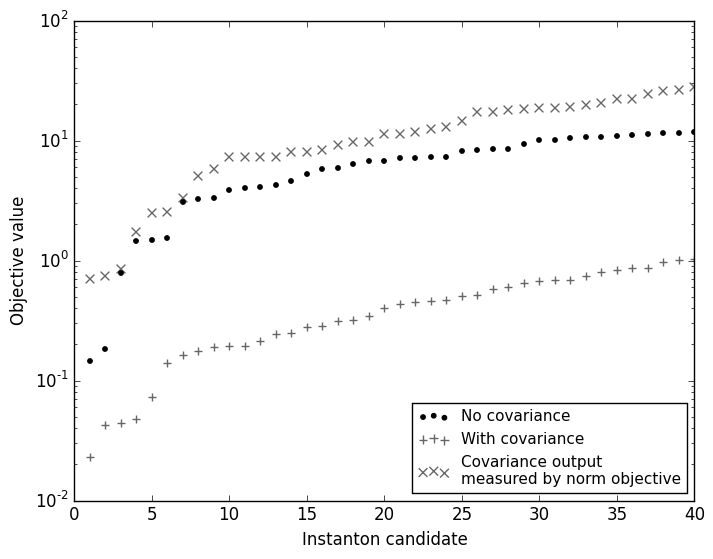

In [153]:
markersize = 40
xx = collect(1:length(ocov.score))
scatter(xx,sort(onocov.score),color="black",marker=".",s=markersize)
hold(true)
scatter(xx,sort(ocov.score),color="black",marker="+",alpha=0.6,s=markersize)
scatter(xx,sort(covtruescores),color="black",marker="x",alpha=0.6,s=markersize)
yscale("log")
legend(["No covariance";"With covariance";"Covariance output \nmeasured by norm objective"],fontsize=11,loc=4)
xlabel("Instanton candidate")
ylabel("Objective value")
xlim([0;40])#[xx[1];xx[end]])
ylim([0.01;1e2])

savefig("../paper2/images/covariance.pdf")